In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
ds = pd.read_csv("Social_Network_Ads.csv")
ds.head(3)

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0

In [3]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x = ds.iloc[:,:-1]
y = ds["Purchased"]

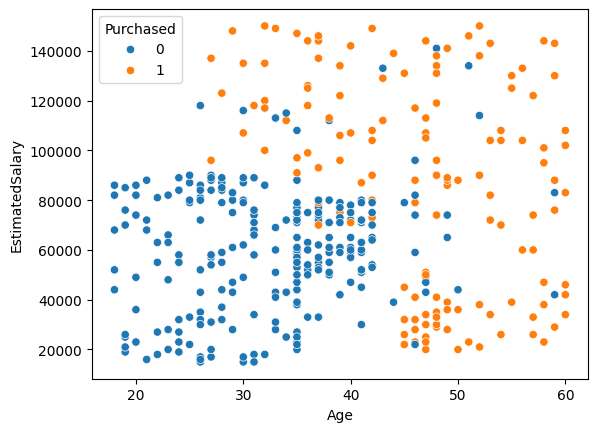

In [5]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=ds,hue="Purchased")
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [8]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
x_train.shape

(320, 2)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
dt1.score(x_test,y_test)*100

83.75

In [42]:
dt.score(x_test,y_test)*100

91.25

In [43]:
dt.score(x_train,y_train)*100

91.875

In [16]:
dt.predict([[19,19000]])

C:\Users\masoo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\masoo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


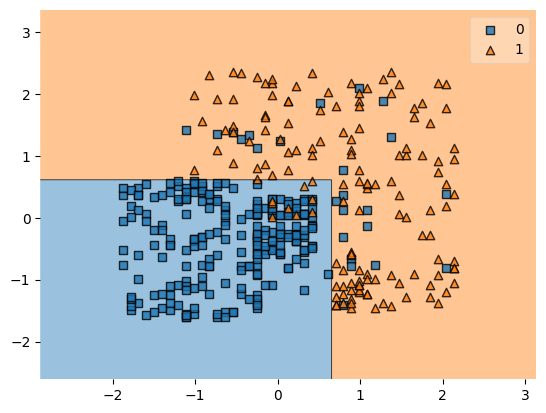

In [44]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
# plt.savefig("dt1.jpg")
plt.show()

In [18]:
from sklearn.tree import plot_tree

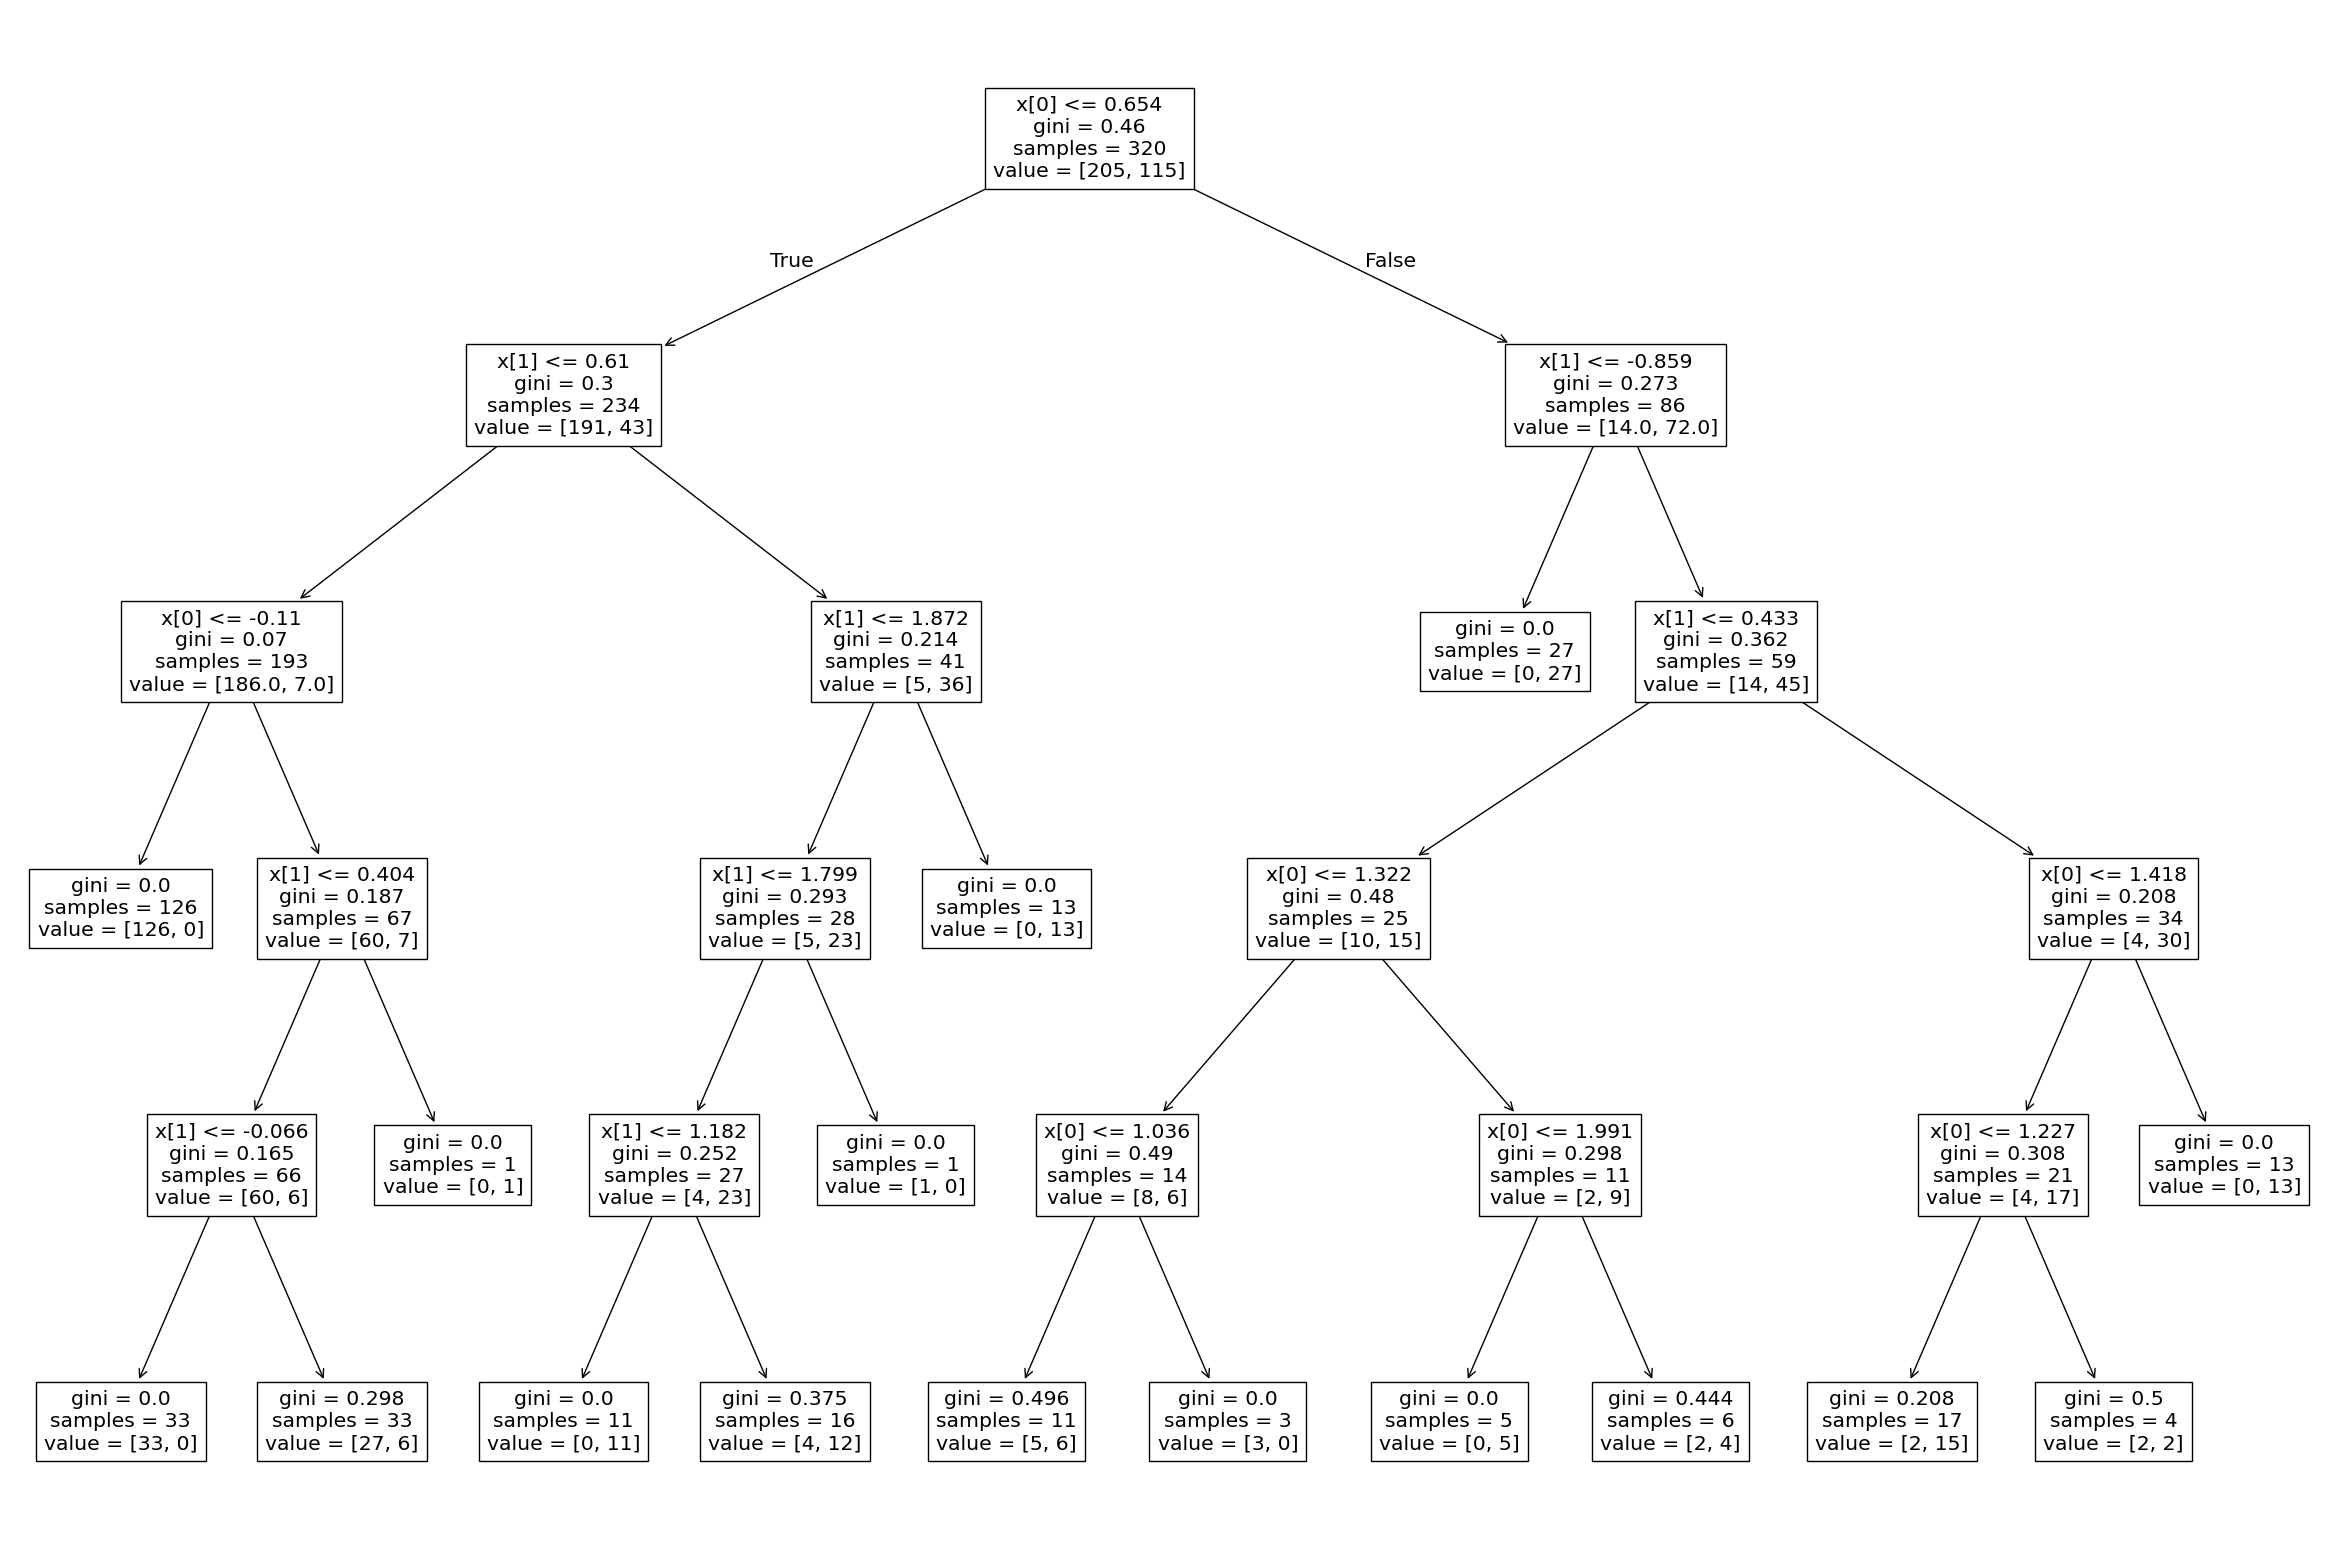

In [36]:
plt.figure(figsize=(30,20))
plt.savefig("dt.jpg")
plot_tree(dt)
plt.show()

In [38]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train)*100,dt2.score(x_test,y_test)*100,i)

82.1875 90.0 1
91.875 91.25 2
91.875 91.25 3
93.125 91.25 4
93.4375 90.0 5
95.0 86.25 6
96.875 85.0 7
97.1875 85.0 8
98.125 85.0 9
98.4375 85.0 10
99.0625 83.75 11
99.375 83.75 12
99.375 83.75 13
99.6875 83.75 14
99.6875 83.75 15
99.6875 83.75 16
99.6875 83.75 17
99.6875 83.75 18
99.6875 83.75 19
